<a href="https://colab.research.google.com/github/begumnurbulut/AirbnbNY/blob/main/Makine_%C3%96%C4%9Frenmesi_Patika_%C3%96dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
tips= sns.load_dataset("tips")
df = tips.copy()

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [9]:
df.rename(columns={"total_bill" : "Fiyat",
                   "tip" : "Bahşiş",
                   "sex" : "Cinsiyet",
                   "smoker" :"Sigara",
                   "day" : "Gün",
                   "time" : "Zaman",
                   "size" : "Kişiler"}, inplace = True)

In [10]:
df.head()

,Fiyat,Bahşiş,Cinsiyet,Sigara,Gün,Zaman,Kişiler
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# **Veri setini tanıyorum**

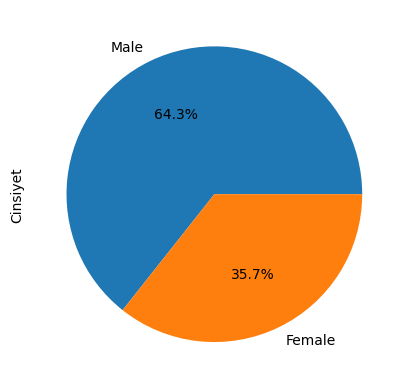

In [11]:
df.Cinsiyet.value_counts().plot(kind="pie", autopct= "%.1f%%")
plt.ylabel("Cinsiyet");

<Axes: ylabel='count'>

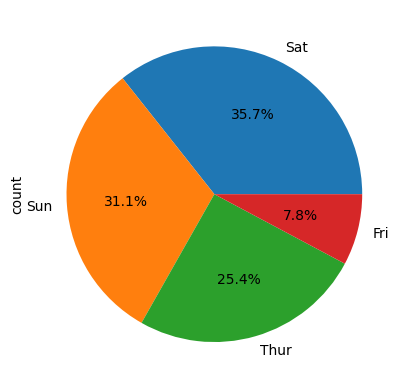

In [12]:
df.Gün.value_counts().plot(kind="pie", autopct= "%.1f%%")

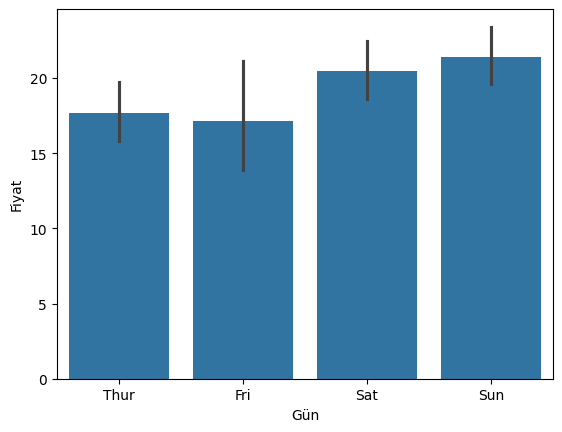

In [13]:
sns.barplot(x="Gün", y= "Fiyat", data=df);

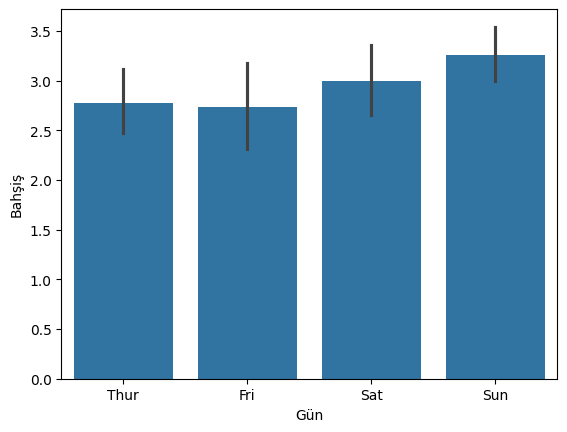

In [14]:
sns.barplot(x="Gün", y= "Bahşiş", data=df);

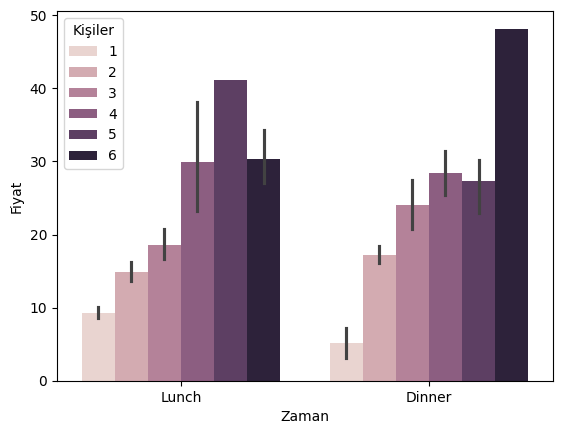

In [15]:
sns.barplot(x="Zaman", y= "Fiyat", hue="Kişiler", data=df);

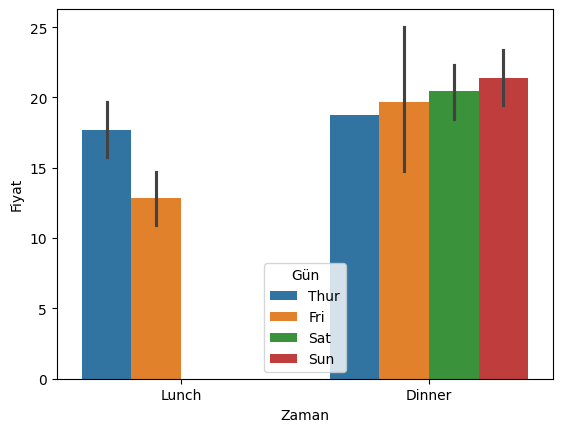

In [16]:
sns.barplot(x="Zaman", y= "Fiyat", hue="Gün", data=df);

# **Metinsel İfadeleri Sayısal Hale Getirme**

In [17]:
df.head()

,Fiyat,Bahşiş,Cinsiyet,Sigara,Gün,Zaman,Kişiler
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
#Cinsiyet
df["Cinsiyet"] = df.Cinsiyet.map({"Female":1, "Male":2})

In [19]:
#Sigara
df["Sigara"] = df.Sigara.map({"Yes":1, "No":0})

In [20]:
#Günler
df.Gün.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [21]:
df["Gün"] = df.Gün.map({"Sat": 1, "Sun": 2, "Thur": 3, "Fri": 4})

In [22]:
#Zaman
df.Zaman.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [23]:
df["Zaman"] = df.Zaman.map({"Lunch":1, "Dinner":2})

In [24]:
df.head()

,Fiyat,Bahşiş,Cinsiyet,Sigara,Gün,Zaman,Kişiler
0,16.99,1.01,1,0,2,2,2
1,10.34,1.66,2,0,2,2,3
2,21.01,3.50,2,0,2,2,3
3,23.68,3.31,2,0,2,2,2
4,24.59,3.61,1,0,2,2,4


# **K En Yakın Komşu Algoritması**

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor

from warnings import filterwarnings
filterwarnings('ignore')


In [26]:
#train - test
df.head()

,Fiyat,Bahşiş,Cinsiyet,Sigara,Gün,Zaman,Kişiler
0,16.99,1.01,1,0,2,2,2
1,10.34,1.66,2,0,2,2,3
2,21.01,3.50,2,0,2,2,3
3,23.68,3.31,2,0,2,2,2
4,24.59,3.61,1,0,2,2,4


In [27]:
#İlk olarak bağımlı ve bağımsız değişkenleri ayırmamız gerekir. Bu veri setinde bağımlı değişken yalnızca "fiyat"dır. Bağımsız değişkenler her zaman "X" ile gösterilir. Y ise bağımlı değişkendir.
X = df.drop(["Fiyat"], axis=1)

In [28]:
Y= df["Fiyat"]

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.20, random_state = 42)

In [30]:
X_train [0:10]

,Bahşiş,Cinsiyet,Sigara,Gün,Zaman,Kişiler
228,2.72,2,0,1,2,2
208,2.03,2,1,1,2,2
96,4.00,2,1,4,2,2
167,4.50,2,0,2,2,4
84,2.03,2,0,3,1,2
55,3.51,2,0,2,2,2
86,2.00,2,0,3,1,2
172,5.15,2,1,2,2,2
242,1.75,2,0,1,2,2
152,2.74,2,0,2,2,3


In [31]:
X_train.shape

(195, 6)

In [32]:
X_test.shape

(49, 6)

In [33]:
Y_train.shape

(195,)

In [34]:
Y_test.shape

(49,)

In [35]:
#Model Oluşturma
knn_model = KNeighborsRegressor()

In [37]:
model = knn_model.fit(X_train, Y_train)

In [38]:
model

KNeighborsRegressor()

In [41]:
yeni_veri = [[2],[1],[1],[1],[1],[2]]

In [45]:
yeni_veri= pd.DataFrame(yeni_veri).T

In [46]:
model.predict(yeni_veri)

array([17.192])

# **TEST HATASI ÖĞRENME**

In [54]:
Y_pred = model.predict(X_test)

In [52]:
np.sqrt(mean_squared_error(Y_test, Y_pred))

6.496588479929372

# **Eğitim Hatası Öğrenme**

In [56]:
np.sqrt(mean_squared_error(Y_train, model.predict(X_train)))

4.998218654988687

# **Farklı K Değerlerine Göre Eğitim Ve Test Hatası Bulma**

In [60]:
#Eğitim Hatası
for k in range (30):
  k=k+1
  k_model = KNeighborsRegressor(n_neighbors = k).fit(X_train,Y_train)
  Y_pred = k_model.predict(X_train)
  hata = np.sqrt(mean_squared_error(Y_train, Y_pred))

  print("k değeri - ", k ,"Hata Değeri - ", hata)

k değeri -  1 Hata Değeri -  1.500826268153475
k değeri -  2 Hata Değeri -  4.062376814700402
k değeri -  3 Hata Değeri -  4.607427213431106
k değeri -  4 Hata Değeri -  5.04873049224588
k değeri -  5 Hata Değeri -  4.998218654988687
k değeri -  6 Hata Değeri -  5.314094344637072
k değeri -  7 Hata Değeri -  5.435486264970446
k değeri -  8 Hata Değeri -  5.518925204118447
k değeri -  9 Hata Değeri -  5.656562042770888
k değeri -  10 Hata Değeri -  5.762932169900301
k değeri -  11 Hata Değeri -  5.78152659979311
k değeri -  12 Hata Değeri -  5.837813458155565
k değeri -  13 Hata Değeri -  5.832063839146572
k değeri -  14 Hata Değeri -  5.873728757438518
k değeri -  15 Hata Değeri -  5.872740727207599
k değeri -  16 Hata Değeri -  5.906064605521968
k değeri -  17 Hata Değeri -  5.9508284168338665
k değeri -  18 Hata Değeri -  5.930526234106209
k değeri -  19 Hata Değeri -  5.953770713523683
k değeri -  20 Hata Değeri -  6.032985314619144
k değeri -  21 Hata Değeri -  6.043986229406251
k 

In [61]:
#Test Hatası
for k in range (30):
  k=k+1
  k_model = KNeighborsRegressor(n_neighbors = k).fit(X_train,Y_train)
  Y_pred = k_model.predict(X_test)
  hata = np.sqrt(mean_squared_error(Y_test, Y_pred))

  print("k değeri - ", k ,"Hata Değeri - ", hata)

k değeri -  1 Hata Değeri -  7.528913654460817
k değeri -  2 Hata Değeri -  7.353550648690547
k değeri -  3 Hata Değeri -  7.1390314675580875
k değeri -  4 Hata Değeri -  6.753792349261174
k değeri -  5 Hata Değeri -  6.496588479929372
k değeri -  6 Hata Değeri -  6.47348451433767
k değeri -  7 Hata Değeri -  6.338638466526502
k değeri -  8 Hata Değeri -  6.474531545775717
k değeri -  9 Hata Değeri -  6.417731711632963
k değeri -  10 Hata Değeri -  6.433111723651283
k değeri -  11 Hata Değeri -  6.18142871604098
k değeri -  12 Hata Değeri -  6.1538050294677795
k değeri -  13 Hata Değeri -  6.184670023853236
k değeri -  14 Hata Değeri -  6.275156540557092
k değeri -  15 Hata Değeri -  6.3497248355758185
k değeri -  16 Hata Değeri -  6.282269264443334
k değeri -  17 Hata Değeri -  6.325024135578905
k değeri -  18 Hata Değeri -  6.342422243162057
k değeri -  19 Hata Değeri -  6.3934808719165215
k değeri -  20 Hata Değeri -  6.429082149950824
k değeri -  21 Hata Değeri -  6.444270035786576

# **En İdeal K Değeri Bulma**

In [64]:
knn_değerleri = {"n_neighbors" : np.arange(1,30,1)}

In [67]:
knn= KNeighborsRegressor()

In [68]:
knn_cv_model= GridSearchCV(knn, knn_değerleri, cv=10)

In [69]:
knn_cv_model.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [70]:
knn_cv_model.best_params_

{'n_neighbors': 12}

# **İdeal K Değeri İle Modeli Oluşturma**

In [71]:
Model = KNeighborsRegressor(n_neighbors=12)

In [72]:
model_knn = model.fit(X_train, Y_train)

In [73]:
model_knn

KNeighborsRegressor()

In [80]:
y_pred = model.predict(X_test)

In [77]:
Y_test[0:10]

24     19.82
6       8.77
153    24.55
211    25.89
198    13.00
176    17.89
192    28.44
124    12.48
9      14.78
101    15.38
Name: Fiyat, dtype: float64

In [81]:
pd.DataFrame({"Y Değerleri": Y_test,
              "Tahmini Değerler": y_pred})

,Y Değerleri,Tahmini Değerler
24,19.82,14.982
6,8.77,15.632
153,24.55,19.088
211,25.89,27.036
198,13.00,13.324
176,17.89,19.398
192,28.44,15.738
124,12.48,14.512
9,14.78,18.522
101,15.38,19.500


In [82]:
t_d= pd.DataFrame({"Y Değerleri": Y_test,
              "Tahmini Değerler": y_pred})

In [83]:
t_d["Fark"] = t_d["Y Değerleri"] - t_d["Tahmini Değerler"]

In [84]:
t_d

,Y Değerleri,Tahmini Değerler,Fark
24,19.82,14.982,4.838
6,8.77,15.632,-6.862
153,24.55,19.088,5.462
211,25.89,27.036,-1.146
198,13.00,13.324,-0.324
176,17.89,19.398,-1.508
192,28.44,15.738,12.702
124,12.48,14.512,-2.032
9,14.78,18.522,-3.742
101,15.38,19.500,-4.120
